<a href="https://colab.research.google.com/github/captmmari/Decsriptive-analysis-Independent-project/blob/main/HOME_AND_AWAY_PREDICTION_SCORES_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the question

Introduction


FIFA World Ranking is a ranking system for National teams in association football, currently led by Germany. The teams of the member nations of FIFA, football's world governing body, are ranked based on their game results with the most successful teams being ranked highest. The rankings were introduced in December 1992, and eight teams (Argentina, Belgium, Brazil, France, Germany, Italy, the Netherlands and Spain) have held the top position, of which Brazil have spent the longest ranked first.

Specifying the question

Predicting number of home and away scores to be scored

# Understanding the context

In this project, we will predict accurate home and away scores to be resulte at the end of a match. we will achieve this by doing Polynomial Regression and logistic regression.

#  Recording the Experimental Design

1 Exploratory Data Analysis

2 Data Cleaning

3 Univariate, Bivariate Analysis

4 Visualizations

5 Polynomial Regression

6 Logistic regression

6 Giving accurate Predictions of home and away scores

# Importing libraries.

In [ ]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

# Loading the dataset


In [ ]:
# fIFA ranking dataset
cp = pd.read_csv('/content/fifa_ranking.csv')
cp

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [ ]:
# Results Dataset
cp1 = pd.read_csv('/content/results.csv')
cp1

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


# Checking the dataset

Fifa ranking dataset

In [ ]:
# Previewing top dataset
cp.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
# Previewing the bottom end of the dataset
cp.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [ ]:
# Checking Dataset shape
cp.shape

(57793, 16)

Fifa ranking dataset has 57793 rows and 16 columns

In [ ]:
# Checking Dataset info
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [ ]:
# Checking dataset description
cp.describe().sum()

rank                       58467.246511
total_points               60043.315500
previous_points            61201.175874
rank_change                57817.794411
cur_year_avg               59183.723485
cur_year_avg_weighted      59183.723485
last_year_avg              59187.922806
last_year_avg_weighted     58490.466521
two_year_ago_avg           59170.283541
two_year_ago_weighted      58206.182126
three_year_ago_avg         59209.727259
three_year_ago_weighted    58076.341486
dtype: float64

In [ ]:
# Checking Dataset type
cp.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

Results dataset

In [ ]:
# Previewing the top of Dataset
cp1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
#Previewing bottom of the dataset
cp1.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [ ]:
# Cheking Dataset shape
cp1.shape

(40839, 9)

REsults dataset has 40839 rows and 9 columns

In [ ]:
# Check for datsaset info
cp1.info

<bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [ ]:
# Checking dataset description
cp1.describe().sum()

home_score    40877.494854
away_score    40865.593224
dtype: float64

In [ ]:
# Checking dataset types
cp1.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

# Cleaning the Datasets

Fifa Ranking dataset

In [ ]:
# Checking for null Values
cp.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

Dataset has no null values

In [ ]:
# Checking for duplicated values
cp.duplicated().sum()

37

Dataset has 37 duplicated values

In [ ]:
# Dropping Duplicated values
pc = cp.drop_duplicates()
print(pc)

       rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57756 rows x 16 columns]


The need to drop duplicated values is because they will produce wrong prediction in regards to the analysis being  done

In [ ]:
# Confirming if duplicates were dropped
pc.duplicated().sum()

0

In [ ]:
# Checking Dataset columns
pc.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [ ]:
# Dropping some columns
pc.drop(['rank_date', 'country_abrv'], axis = 1, inplace = True);
pc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
57789,206,Bahamas,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
57790,206,Eritrea,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF
57791,206,Somalia,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF


Dropped some columns this is because I will not use them in our analyses

In [ ]:
# Renaming Some columns
pc.rename({'cur_year_avg' : 'cur_avg', 'cur_year_avg_weighted' : 'cur_weighted'}, axis = 1, inplace = True)
pc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country_full,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
57789,206,Bahamas,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
57790,206,Eritrea,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF
57791,206,Somalia,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF


Renamed some columns for easy reference

In [ ]:
# Renaming the country full column
pc.rename({'country_full' : 'country'}, axis = 1, inplace = True)
pc

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,rank,country,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
57789,206,Bahamas,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF
57790,206,Eritrea,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF
57791,206,Somalia,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF


In [ ]:
# Creating new cleaned dataset
pc.to_csv('df.csv')


In [ ]:
# Loading new cleaned dataset
df = pd.read_csv('/content/df.csv')
df.head()

,Unnamed: 0,rank,country,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,1,2,Italy,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,2,3,Switzerland,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,3,4,Sweden,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,4,5,Argentina,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


Results dataset

In [ ]:
# Checking for null values
cp1.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

Dataset has no null values

In [ ]:
# Checking for duplicated values
cp1.duplicated().sum()

0

Dataset has no duplicated values

In [ ]:
# Checking Dataset columns names
cp1.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [ ]:
# Dropping some columns
cp1.drop('date', axis = 1, inplace = True)
cp1

,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,England,Scotland,4,2,Friendly,London,England,False
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,England,Scotland,2,2,Friendly,London,England,False
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True


Dropped some columns as I will not use them in my analyses

In [ ]:
# creating new cleaned dataset
cp1.to_csv('fd.csv')

In [ ]:
# Loading new Dataset
fd = pd.read_csv('/content/fd.csv')
fd.head()

,Unnamed: 0,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1,England,Scotland,4,2,Friendly,London,England,False
2,2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,3,England,Scotland,2,2,Friendly,London,England,False
4,4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# Joining The two datasets

In [ ]:
# Merging the two datasets
sport = pd.merge(df, fd, on = 'country')
sport.head()

,Unnamed: 0_x,rank,country,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,Unnamed: 0_y,home_team,away_team,home_score,away_score,tournament,city,neutral
0,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,234,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,259,Germany,Belgium,0,3,Friendly,Duisburg,False
2,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,268,Germany,Netherlands,1,2,Friendly,Kleve,False
3,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,281,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,296,Germany,Austria,1,2,Friendly,Dresden,False


Merged the two datasets with the country column for more accurate predictions and visualizations

In [ ]:
# Creating new dataset
sport.to_csv('sport.csv')

In [ ]:
# loading merged dataset
sp = pd.read_csv('/content/sport.csv')
sp.head()

,Unnamed: 0,Unnamed: 0_x,rank,country,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,Unnamed: 0_y,home_team,away_team,home_score,away_score,tournament,city,neutral
0,0,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,234,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,259,Germany,Belgium,0,3,Friendly,Duisburg,False
2,2,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,268,Germany,Netherlands,1,2,Friendly,Kleve,False
3,3,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,281,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,4,0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,296,Germany,Austria,1,2,Friendly,Dresden,False


In [ ]:
sp.drop(['Unnamed: 0', 'Unnamed: 0_x'], axis = 1, inplace = True)
sp.head()

,rank,country,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,Unnamed: 0_y,home_team,away_team,home_score,away_score,tournament,city,neutral
0,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,234,Germany,Switzerland,1,0,Friendly,Karlsruhe,False
1,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,259,Germany,Belgium,0,3,Friendly,Duisburg,False
2,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,268,Germany,Netherlands,1,2,Friendly,Kleve,False
3,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,281,Germany,Switzerland,6,2,Friendly,Stuttgart,False
4,1,Germany,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,296,Germany,Austria,1,2,Friendly,Dresden,False


# Univariate Analysis.

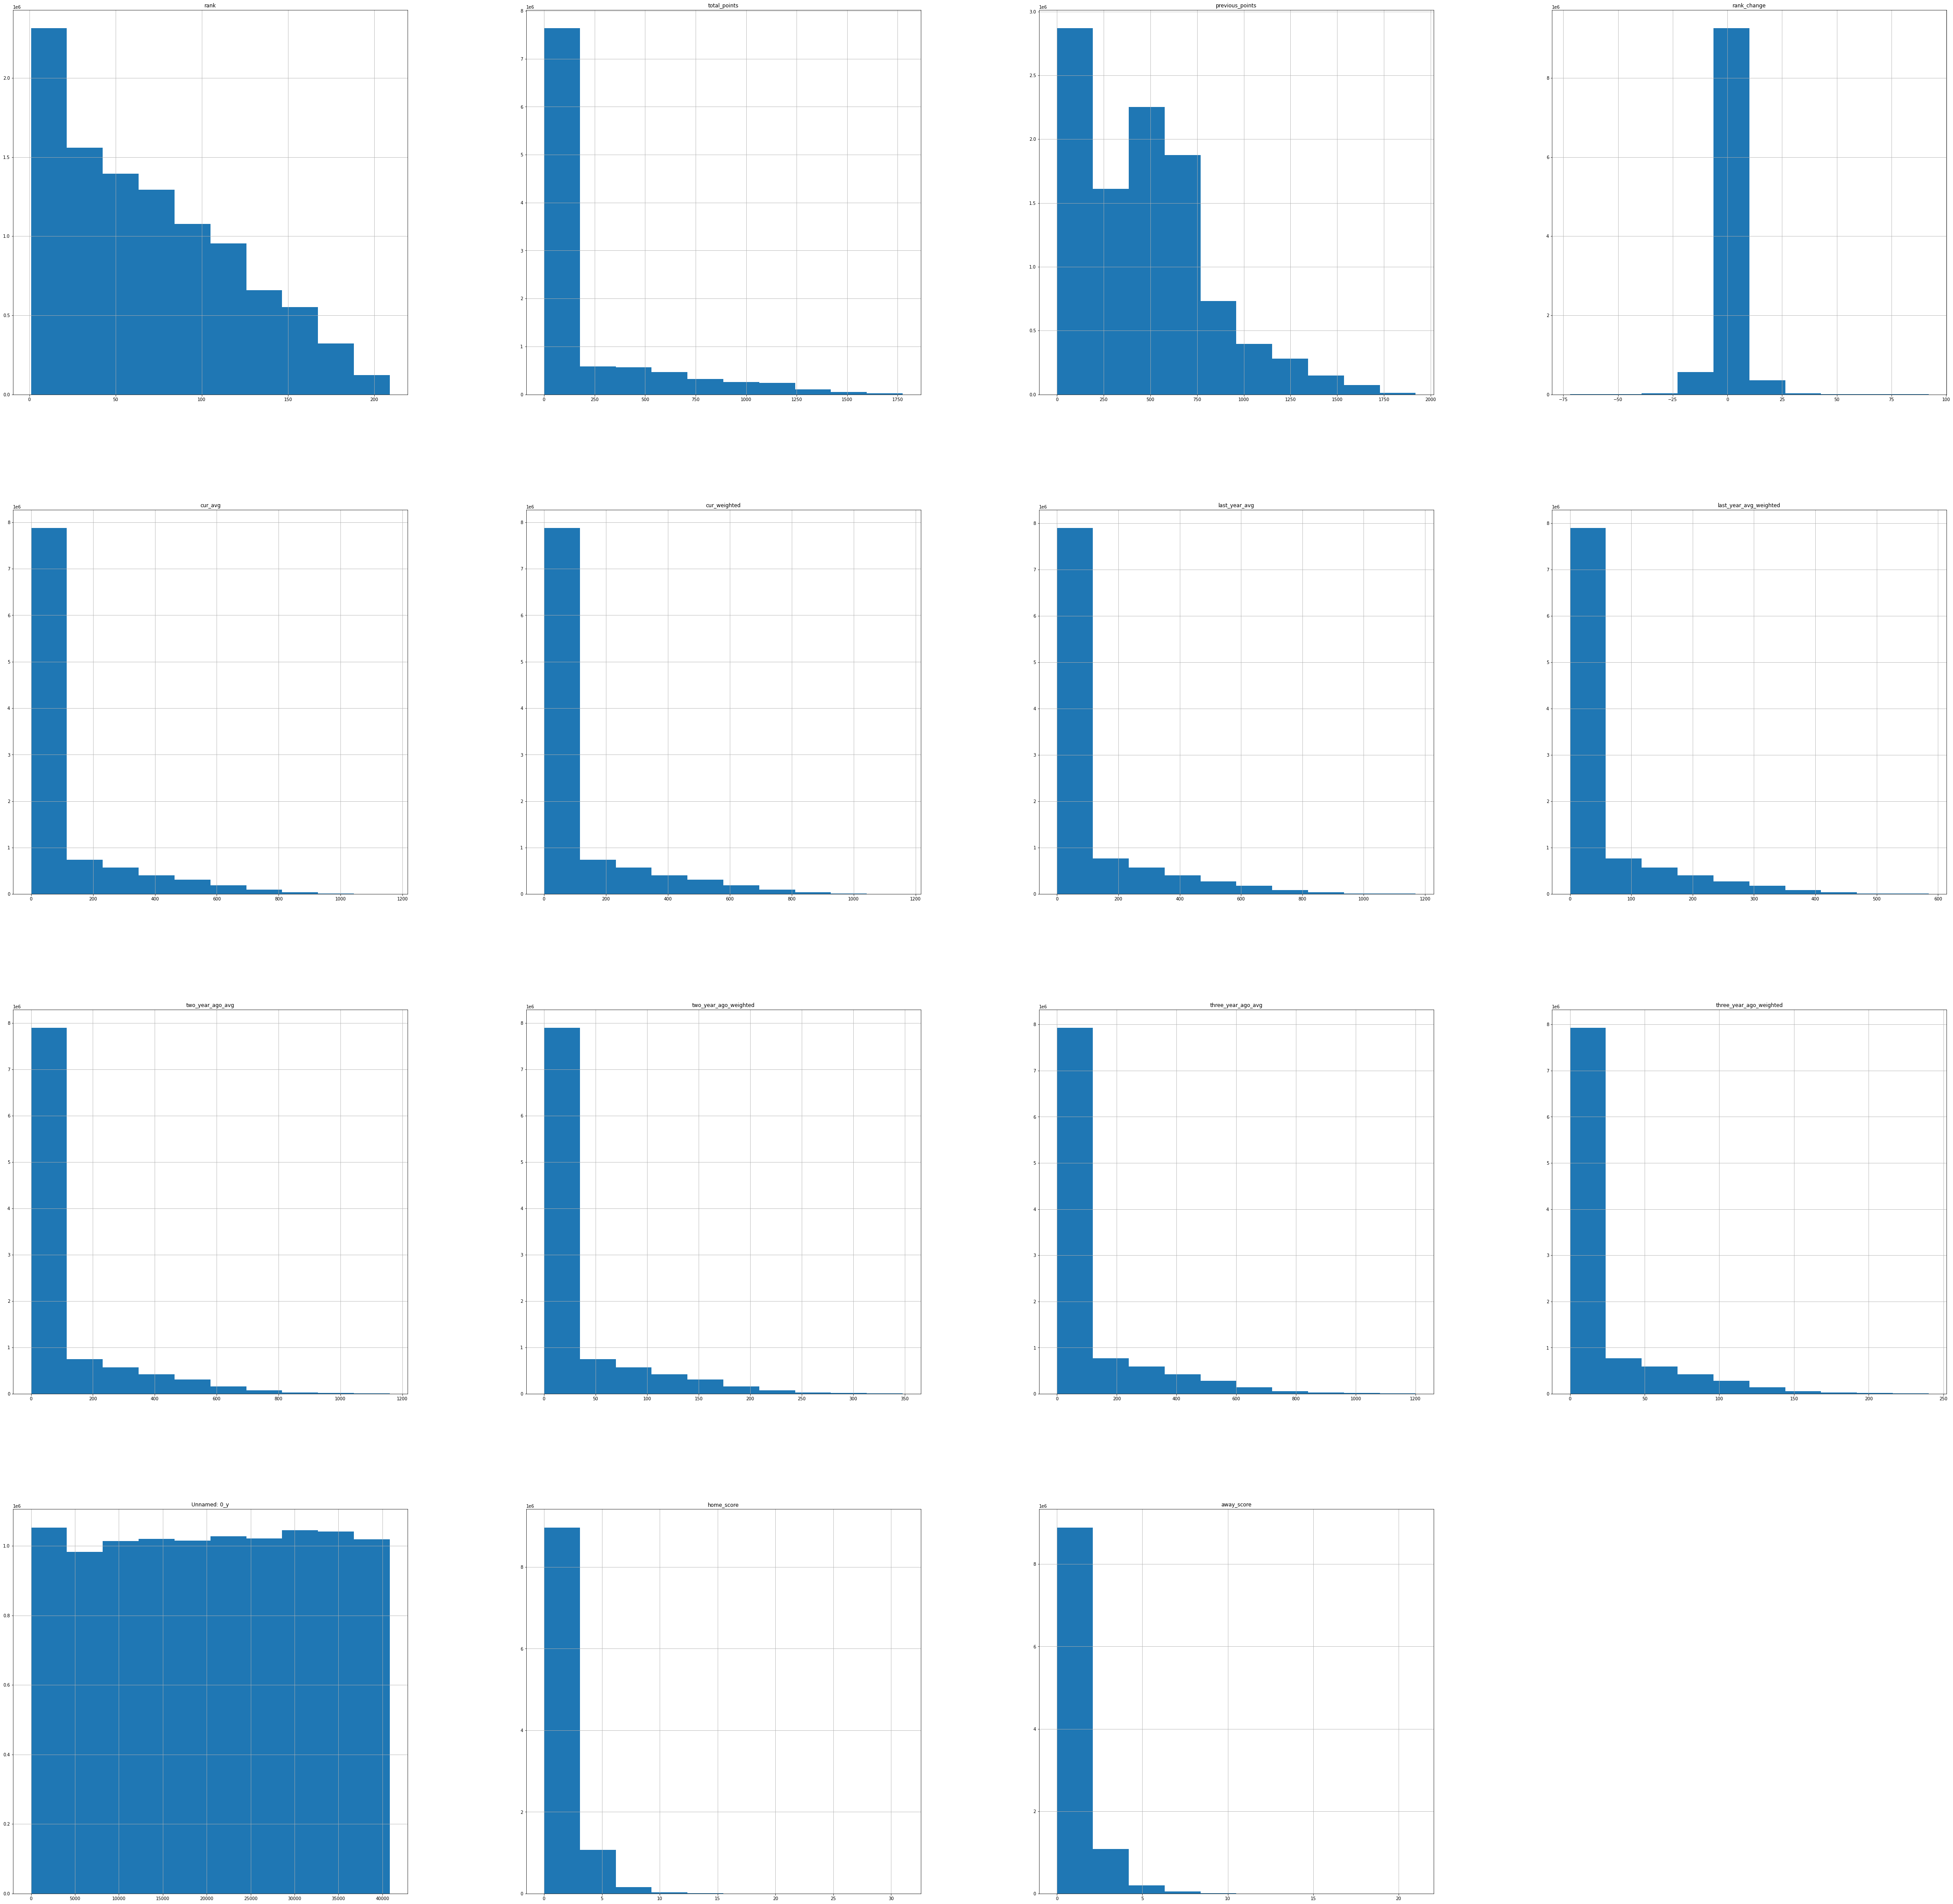

In [ ]:
# Plotting Histograms
sp.hist(figsize=(80,80), sharex=False, sharey=False, xlabelsize= 10, ylabelsize=10)
plt.show()

Most of the columns have data that are skewed to the left, with very few skewed to the right and uniformly.

In [ ]:
# Finfing most played Tournament
sp['tournament'].mode()

# Friendlies were the most played competition globally

0    Friendly
dtype: object

In [ ]:
sp['city'].mode()

# Kuala Lumpur is the city that is mostly used to play these games

0    Kuala Lumpur
dtype: object

In [ ]:
# Finding which cup was played most
sp['confederation'].mode()

# UEFA is the most played cup globally

0    UEFA
dtype: object

In [ ]:
# Finding average modal appearances
sp['rank_change'].mode()

# This shows that there is no competition in the rankings, as most countries retained theire postions

0    0
dtype: int64

In [ ]:
# Finding mean of total points
sp['total_points'].mean()

172.32034549775713

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


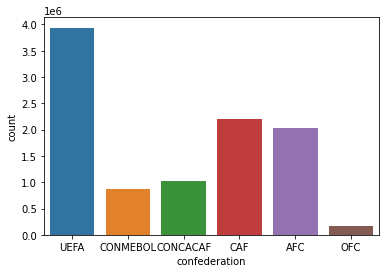

In [ ]:
# Plotting the count of the confederation cups done
sns.countplot(sp['confederation'])

UEFA is the most played tournament while OFC being the least

In [ ]:
# Plotting the count of confederation cups
sp['confederation'].unique()

array(['UEFA', 'CONMEBOL', 'CONCACAF', 'CAF', 'AFC', 'OFC'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


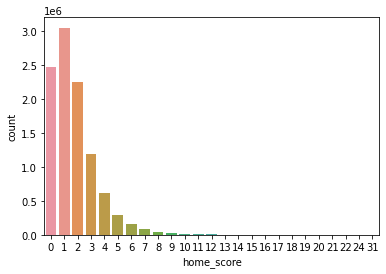

In [ ]:
# Plotting the count on different types of tournaments
sns.countplot(sp['home_score'])

An average of 1 goal is scored at home in every competition

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


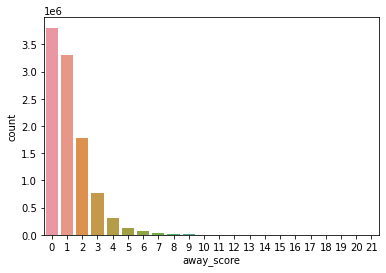

In [ ]:
sns.countplot(sp['away_score'])

Number of away score mostly appearing to be 0 scores averagely in the competitions.

# Bivariate Analysis

In [ ]:
# Checking how our varibales are corelated using a matrix
corrMatrix = sp.corr()
corrMatrix

# From the matrix belwo we observe that correlation amongst our variables is not very strong
#The highest being negative correlation of-0.088731	between home score and the rank 

,rank,total_points,previous_points,rank_change,cur_avg,cur_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,Unnamed: 0_y,home_score,away_score,neutral
rank,1.000000,-0.280537,-0.625583,-0.057668,-0.281540,-0.281540,-0.260476,-0.260476,-0.252044,-0.252044,-0.245878,-0.245877,0.166004,-0.088731,0.091994,0.061838
total_points,-0.280537,1.000000,0.532221,0.017485,0.977570,0.977570,0.941783,0.941783,0.932176,0.932176,0.924420,0.924420,-0.054473,0.030164,-0.022225,-0.018039
previous_points,-0.625583,0.532221,1.000000,-0.023381,0.523567,0.523567,0.501861,0.501861,0.489813,0.489813,0.483172,0.483172,-0.112020,0.064523,-0.053175,-0.032184
rank_change,-0.057668,0.017485,-0.023381,1.000000,0.038874,0.038874,-0.011049,-0.011049,-0.000912,-0.000912,0.001080,0.001081,0.001919,0.000126,-0.000605,-0.001799
cur_avg,-0.281540,0.977570,0.523567,0.038874,1.000000,1.000000,0.865885,0.865886,0.878200,0.878200,0.866941,0.866942,-0.053283,0.028716,-0.020473,-0.017698
cur_weighted,-0.281540,0.977570,0.523567,0.038874,1.000000,1.000000,0.865885,0.865886,0.878200,0.878200,0.866941,0.866942,-0.053283,0.028716,-0.020473,-0.017698
last_year_avg,-0.260476,0.941783,0.501861,-0.011049,0.865885,0.865885,1.000000,1.000000,0.863839,0.863839,0.882858,0.882858,-0.051535,0.028747,-0.021661,-0.016195
last_year_avg_weighted,-0.260476,0.941783,0.501861,-0.011049,0.865886,0.865886,1.000000,1.000000,0.863839,0.863839,0.882858,0.882858,-0.051535,0.028747,-0.021660,-0.016195
two_year_ago_avg,-0.252044,0.932176,0.489813,-0.000912,0.878200,0.878200,0.863839,0.863839,1.000000,1.000000,0.868890,0.868890,-0.051099,0.029029,-0.021838,-0.018049
two_year_ago_weighted,-0.252044,0.932176,0.489813,-0.000912,0.878200,0.878200,0.863839,0.863839,1.000000,1.000000,0.868890,0.868891,-0.051099,0.029029,-0.021838,-0.018049


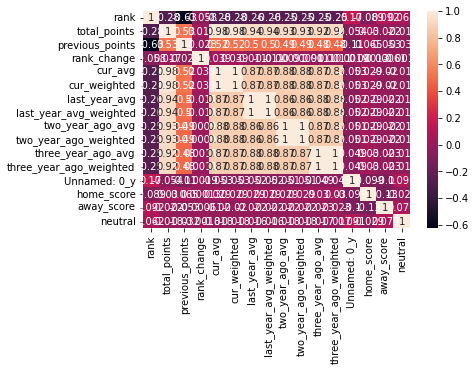

In [ ]:
# investigating the correlation between variables

corelation = sp.corr()
# using a heatmap to display the results
sns.heatmap(corelation,xticklabels = corelation.columns, yticklabels = corelation.columns, annot=True)

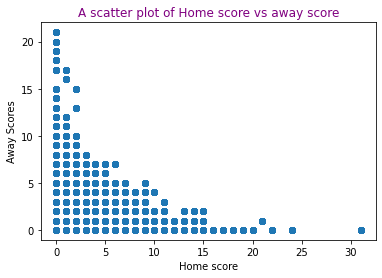

In [ ]:
#Plotting our scatterplot using matplotlibplt.figure(dpi = 100)
plt.scatter(sp['home_score'], sp['away_score'])
plt.title('A scatter plot of Home score vs away score', color = 'purple')

plt.xlabel('Home score')

plt.ylabel('Away Scores')

plt.show()

This averagely shows that home scores occur more as compared to away scores

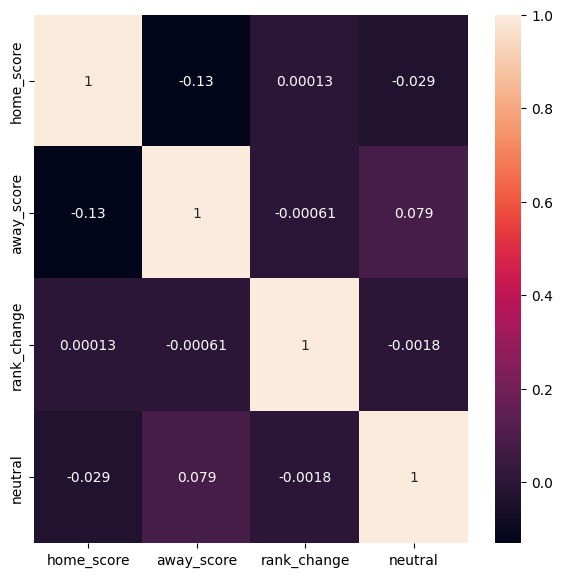

In [ ]:
# heatmap to show correlation 

 # heatmap to show correlation 
col_names = ['home_score','away_score', 'confederation',
             'tournament','rank_change','city','country','neutral']
plt.figure(figsize=[7, 7], dpi = 100)
sns.heatmap(sp[col_names].corr(), annot=True);

# Employment Influences GDP as compared to other factors

# Polynomial Regression

In [ ]:


#Get the home score and thlast column from the dataset 
X = sp.iloc[:, 4].values
y = sp.iloc[:, 5].values
print(X)
print(y)

[0 0 0 ... 1 1 1]
[ 0.    0.    0.   ... 34.16 34.16 34.16]


In [ ]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Salary Prediction (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()


ValueError: ignored

# Logistic regression

In [ ]:
# Splitting our dataset
#
X = sp.drop("home_scor",axis=1)
y = sp["home_score"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)